## How to collect data from tmdb movies using API

In [1]:
import tmdbsimple as tmdb
import requests
import pandas as pd
import os

api_key=os.environ.get('API_KEY')

In [2]:
dfs = []  # create an empty list to store the dataframes
for i in range(1,500):
    response = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=' +api_key+ '&language=en-US&page=()')
    temp_df = pd.DataFrame(response.json()['results'], columns=list(response.json()['results'][0].keys()))
    dfs.append(temp_df)  # append each dataframe to the list

In [3]:
df = pd.concat(dfs, ignore_index=True)  # concatenate all dataframes in the list into one

In [4]:
# Find the shape of the dataframe
df.shape

(9980, 14)

In [5]:
#response.json()

In [6]:
#cols=list(response.json()['results'][0].keys())
#cols

In [7]:
df.to_csv('movietmdb.csv', index=False)

In [8]:
df=pd.read_csv('movietmdb.csv')

In [9]:
df.head()

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/tmU7GeKVybMWFButWEGl2M4GeiP.jpg,"[18, 80]",238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",108.277,/3bhkrj58Vtu7enYsRolD1fZdja1.jpg,1972-03-14,The Godfather,False,8.7,17736
1,False,/iNh3BivHyg5sQRPP1KOkzguEX0H.jpg,"[18, 80]",278,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,93.441,/q6y0Go1tsGEsmtFryDOJo3dEmqu.jpg,1994-09-23,The Shawshank Redemption,False,8.7,23591
2,False,/ejniJnlOdtSgtbh8D7u2RxT6Uli.jpg,"[35, 14]",772071,es,Cuando Sea Joven,70-year-old Malena gets a second chance at lif...,30.534,/6gIJuFHh5Lj4dNaPG3TzIMl7L68.jpg,2022-09-14,Cuando Sea Joven,False,8.6,213
3,False,/kGzFbGhp99zva6oZODW5atUtnqi.jpg,"[18, 80]",240,en,The Godfather Part II,In the continuing saga of the Corleone crime f...,61.840,/hek3koDUyRQk7FIhPXsa6mT2Zc3.jpg,1974-12-20,The Godfather Part II,False,8.6,10741
4,False,/zb6fM1CX41D9rF9hdgclu0peUmy.jpg,"[18, 36, 10752]",424,en,Schindler's List,The true story of how businessman Oskar Schind...,45.614,/sF1U4EUQS8YHUYjNl3pMGNIQyr0.jpg,1993-12-15,Schindler's List,False,8.6,13951


In [10]:
df.original_language.value_counts()

en    6487
ja    1497
es     499
hi     499
ko     499
it     499
Name: original_language, dtype: int64

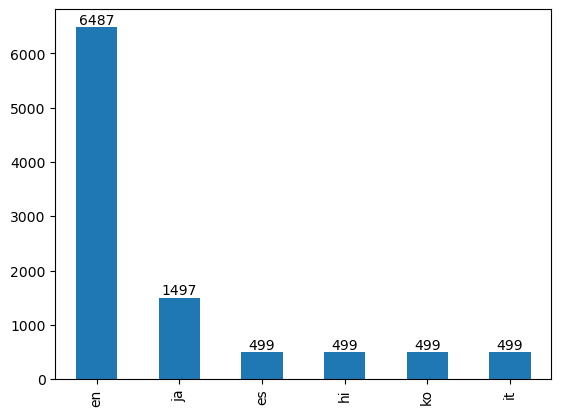

In [16]:
from matplotlib import pyplot as plt

ax=df.original_language.value_counts().plot.bar()

for container in ax.containers:
    ax.bar_label(container)